## Linear Regression - Fundamentals - From Scratch

In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [54]:
np.random.seed(100)

#### Create the Feature Set

In [55]:
X = 2.5 * np.random.randn(100) + 1.5 

In [56]:
X

array([-2.87441368,  2.35670101,  4.38258951,  0.86890991,  3.95330197,
        2.7855471 ,  2.05294917, -1.17510833,  1.02626042,  2.13750361,
        0.35493254,  2.58790872,  0.04101237,  3.54211768,  3.18180201,
        1.23897214,  0.17179906,  4.07433171,  0.40466094, -1.29579562,
        5.54745415,  5.35401294,  0.87030215, -0.60608935,  1.96129673,
        3.8427055 ,  3.32750086,  4.90389031,  0.68440485,  1.63919004,
        2.05599902, -2.10804249, -0.39088076,  3.54113503,  3.3761119 ,
        0.36013268,  4.47405567, -2.72654207, -1.89099762, -1.58108628,
        0.1389021 , -0.17042934,  1.51828641, -0.03234684,  4.74937019,
       -2.83273906, -0.95827525,  2.39376938, -2.53394626,  5.17678467,
       -1.47004399,  0.12563452, -0.8501154 , -0.56983091,  1.77215867,
        2.76952398, -0.65556837,  4.62367436,  1.30097189, -0.7243287 ,
       -0.70449597,  1.54659737,  2.09461155,  1.53387137, -2.5888235 ,
       -1.11052469,  3.0325972 ,  3.34051303,  4.0673036 , -2.08

In [58]:
X = 2.5 * np.random.randn(100) + 1.5 

res = 0.5 * np.random.randn(100) 

In [59]:
y = 2 + 0.3 * X + res  

In [61]:
df = pd.DataFrame({'X': X,'y': y})

In [63]:
df.head()

,X,y
0,3.011059,2.629072
1,-0.767576,1.743410
2,2.980058,4.480713
3,0.407339,3.789303
4,1.754439,3.328018


#### Regression Equation 

$$ Y_{pred} = \alpha + \beta * X $$

The parameters for the regression equations

#### Covariance

$$ \beta = \frac{\sum_{i=1}^{n}(X_i - \overline X)(Y_i - \overline Y)}{\sum_{i=1}^{n}(X_i - \overline X)^2} $$

#### Variance

$$ \alpha = \overline Y - \beta*\overline X $$

In [64]:
xmean = np.mean(X)

ymean = np.mean(y)

# Calculate the terms needed for the numator and denominator of beta
df['xycov'] = (df['X'] - xmean) * (df['y'] - ymean)
df['xvar'] = (df['X'] - xmean)**2

# Calculate beta and alpha
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

alpha = 2.0467893140207383
beta = 0.29755690847967486


##### Now our model can be written as 

Yₑ = 2.048 + 0.293 X

In [19]:
ypred = alpha + beta * X

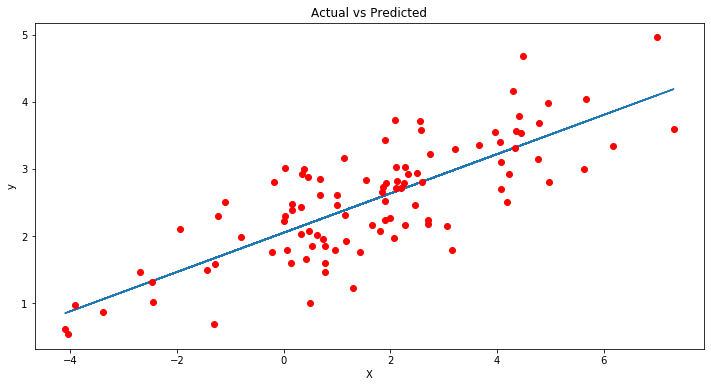

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(X, ypred)# regression line
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

$$ \sum_{i=1}^{n}(Y_i - Y_{e_i})^2 = \sum_{i=1}^{n} (Y_i - (\alpha + \beta * X_i))^2 $$

### Model Evaluation

$$ R^2 value = \frac{RSS}{TSS} $$

`RSS - Residual Sum of Squares`

`TSS - Total Sum of Squares`

**R Sqaured Value**

R-squared is always between 0 and 100%:

1. 0% represents a model that does not explain any of the variation in the response variable around its mean. The mean of the dependent variable predicts the dependent variable as well as the regression model.

2. 100% represents a model that explains all of the variation in the response variable around its mean.

Usually, the larger the R2, the better the regression model fits your observations. However, this guideline has important caveats that I’ll discuss in both this post and the next post.

In [65]:
# Adding the column predicted 
df['ypred'] = ypred

df['RSS'] = (df['ypred'] - ymean)**2

df['TSS'] = (df['y'] - ymean)**2

RSS = df['RSS'].sum()
TSS = df['TSS'].sum()

# Calculate new R2
R2 = RSS / TSS
print(f'New R2 = {R2}.')

New R2 = 0.5045346498493093.


In [ ]:
0 to 1